# Assignment 1

## A bit of info before you start.


> ***First and foremost, dont use AI to code. Use it to understand and then write code yourself. Use AI to verify if the code you wrote it correct, that will help you learn far far more.***

> ***Implement Stuff from sratch. Use cv2 functions only when numpy implementation can be extremely tedious.***



You will need to use your own image for this assignment, which you need to import into here.
If you cant fetch your image from any APIs that dont need credentials, then :
To preserve an image in Google Colab without a continuous runtime or using Google Drive, you can use base64 string encoding of images ( its really simple )

First, begin by normally uploading the image into the contents folders as you normally do in colab or fetch it using Drive or any API.

To get the base64 string :
```
import base64
with open("your_image.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())
```

Note that the base64 string is a very long string, click on the three dot icon to the left of the current code cell and click on <code> Copy Cell Output </code> to easily copy it to your clipboard.

Then, to embed the string into your Jupyter Notebook :
```
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = "iVBORw0K..."  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
```
The string is really long so, use a multiline string in python ( syntax : """ """ )

Otherwise, you can also choose to use any API ( try researching on https://picsum.photos/ )

## Part A

### Load your image

1. Display it in RGB

2. Convert to grayscale ( use NumPy to calculate aggregates using the weighted sum formula )

3. Use the cvtColor function to do the same and compare results

3. Print the array shapes of both the RGB and grayscale images

4. Print a few pixel values of both

( Do you notice the difference that number of channels created on the array shape ?? )

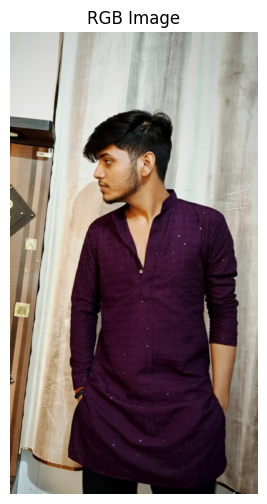

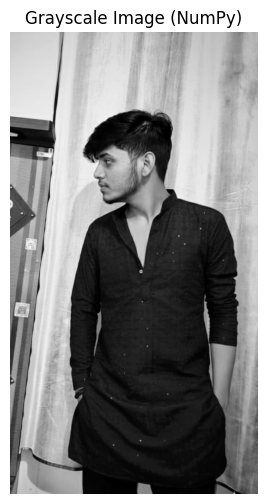

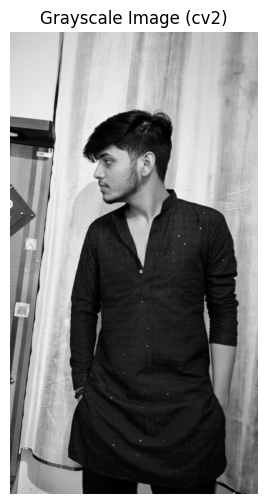


Array Shapes:
  RGB Image Shape: (1095, 587, 3)
  Grayscale (NumPy) Image Shape: (1095, 587)
  Grayscale (cv2) Image Shape: (1095, 587)

Pixel at (0,0):
  RGB: [193 195 190]
  Grayscale (NumPy): 193
  Grayscale (cv2): 194

Pixel at (10,10):
  RGB: [197 199 194]
  Grayscale (NumPy): 197
  Grayscale (cv2): 198


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


image_path = "/content/Ashit Yadav_image.jpeg"
bgr_img = cv2.imread(image_path)

if bgr_img is None:
    raise FileNotFoundError(f"Image not found at path: {image_path}")


rgb_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(6, 6))
plt.imshow(rgb_img)
plt.title("RGB Image")
plt.axis("off")
plt.show()


gray_numpy = np.dot(rgb_img[..., :3], [0.2989, 0.5870, 0.1140]).astype(np.uint8)
plt.figure(figsize=(6, 6))
plt.imshow(gray_numpy, cmap='gray')
plt.title("Grayscale Image (NumPy)")
plt.axis("off")
plt.show()


gray_cv2 = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(6, 6))
plt.imshow(gray_cv2, cmap='gray')
plt.title("Grayscale Image (cv2)")
plt.axis("off")
plt.show()


print("\nArray Shapes:")
print(f"  RGB Image Shape: {rgb_img.shape}")
print(f"  Grayscale (NumPy) Image Shape: {gray_numpy.shape}")
print(f"  Grayscale (cv2) Image Shape: {gray_cv2.shape}")


print("\nPixel at (0,0):")
print(f"  RGB: {rgb_img[0, 0]}")
print(f"  Grayscale (NumPy): {gray_numpy[0, 0]}")
print(f"  Grayscale (cv2): {gray_cv2[0, 0]}")
print("\nPixel at (10,10):")
print(f"  RGB: {rgb_img[10, 10]}")
print(f"  Grayscale (NumPy): {gray_numpy[10, 10]}")
print(f"  Grayscale (cv2): {gray_cv2[10, 10]}")



## Part B
### B1. Compute the FFT of the grayscale image ( use NumPy )
Steps:
1. <code>np.fft.fft2</code>
2. <code>np.fft.fftshift</code>
3. Store as <code>fshift</code>

### B2. Compute magnitude, phase and display Magnitude Spectrum

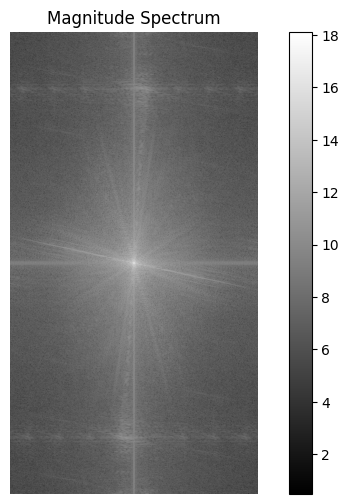

Original grayscale shape: (1095, 587)
FFT shape: (1095, 587)
Shifted FFT shape: (1095, 587)
Magnitude shape: (1095, 587)
Phase shape: (1095, 587)
Sample magnitude at center: 73600587.0
Sample phase at center: 3.543876036115524e-18


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

f = np.fft.fft2(gray_img)
fshift = np.fft.fftshift(f)
magnitude = np.abs(fshift)
phase = np.angle(fshift)
plt.figure(figsize=(8, 6))
plt.imshow(np.log(1 + magnitude), cmap='gray')
plt.title('Magnitude Spectrum')
plt.colorbar()
plt.axis('off')
plt.show()

print(f"Original grayscale shape: {gray_img.shape}")
print(f"FFT shape: {f.shape}")
print(f"Shifted FFT shape: {fshift.shape}")
print(f"Magnitude shape: {magnitude.shape}")
print(f"Phase shape: {phase.shape}")
print(f"Sample magnitude at center: {magnitude[magnitude.shape[0]//2, magnitude.shape[1]//2]}")
print(f"Sample phase at center: {phase[magnitude.shape[0]//2, magnitude.shape[1]//2]}")


## Part C
### C1. Create 3 LPF masks

Radii of filter: 10, 30, 80 (or image-size dependent, mention if you change)

For each:

1. Create a mask

2. Apply to <code>fshift</code>

3. Reconstruct using <code>ifftshift + ifft2</code>

4. Show blur levels increasing as radius decreases ( think why and write reason in code comment )

### C2. Create HPF mask

1. Apply

2. Reconstruct

### C3. Create a square LPF mask
Keep side of square as 50. The square will be at the center of the filter.
Apply, Recontruct and show the output.

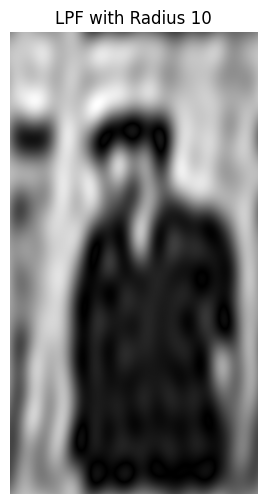

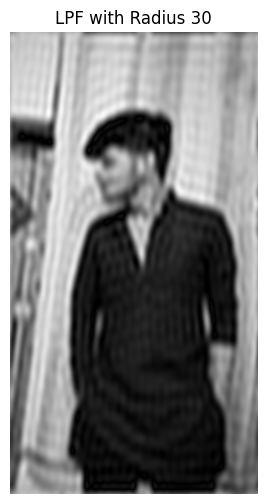

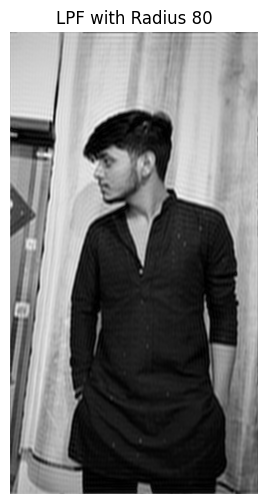

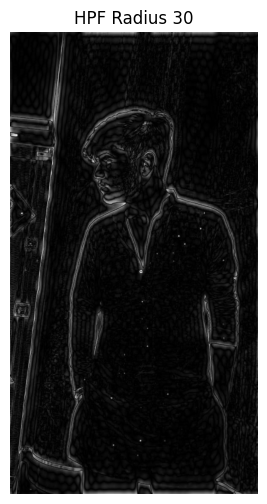

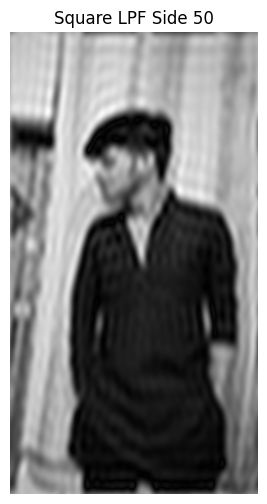

In [ ]:
# Your PART C codes follow here. You can create more cells under this. Write clean and commented code.


rows, cols = gray_img.shape
crow, ccol = rows // 2, cols // 2


def reconstruct_image(fshift_filtered):
    f_ishift = np.fft.ifftshift(fshift_filtered)
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.abs(img_back)
    return img_back


radii = [10, 30, 80]

for r in radii:

    mask_lpf = np.zeros((rows, cols), dtype=np.float32)
    y, x = np.ogrid[:rows, :cols]

    distance = np.sqrt((x - ccol)**2 + (y - crow)**2)

    mask_lpf[distance <= r] = 1


    fshift_lpf = fshift * mask_lpf


    img_lpf = reconstruct_image(fshift_lpf)


    plt.figure(figsize=(8, 6))
    plt.imshow(img_lpf, cmap='gray')
    plt.title(f'LPF with Radius {r}')
    plt.axis('off')
    plt.show()


hpf_radius = 30
y, x = np.ogrid[:rows, :cols]
mask_hpf = (x - ccol)**2 + (y - crow)**2 > hpf_radius**2
mask_hpf = mask_hpf.astype(np.float32)

fshift_hpf = fshift * mask_hpf

img_hpf = reconstruct_image(fshift_hpf)

plt.figure(figsize=(8, 6))
plt.imshow(img_hpf, cmap='gray')
plt.title(f'HPF Radius {hpf_radius}')
plt.axis('off')
plt.show()


square_side = 50
half_side = square_side // 2
mask_square = np.zeros((rows, cols), dtype=np.float32)
mask_square[crow - half_side:crow + half_side, ccol - half_side:ccol + half_side] = 1

fshift_square = fshift * mask_square

img_square = reconstruct_image(fshift_square)

plt.figure(figsize=(8, 6))
plt.imshow(img_square, cmap='gray')
plt.title(f'Square LPF Side {square_side}')
plt.axis('off')
plt.show()

## Part D

###D1. Phase-only reconstruction

Use: <code>phase_only = fshift / np.abs(fshift)</code>

1. Reconstruct and display.
2. Also in code comments, mention the differnce between this code line and the one in the lecture : <code>np.angle(f_shift)</code>
3. Try recontruction from <code>np.angle(f_shift)</code> once and explain your output in code comments.



###D2. Magnitude-only reconstruction

Use: <code>mag_only = np.abs(fshift)</code>

1. Reconstruct and display.
2. Take a guess for the role of logarithm in Magnitude Spectrum. Why does this look different than what Magnitude Spectrum looked like ? Mention in code comments again.

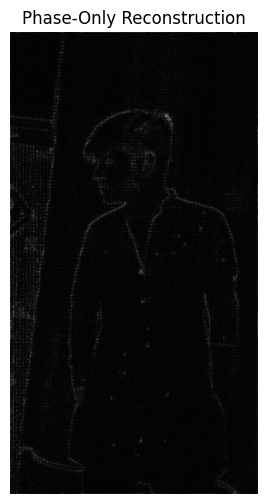

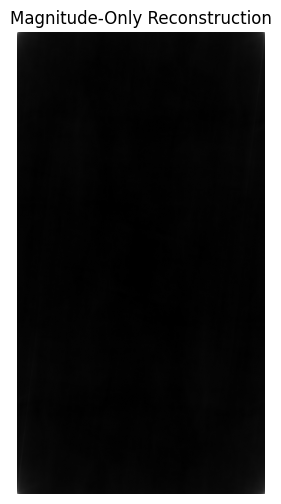

In [ ]:
# Your PART D codes follow here. You can create more cells under this. Write clean and commented code.

phase_only = fshift / np.abs(fshift)
img_phase_only = reconstruct_image(phase_only)

plt.figure(figsize=(8, 6))
plt.imshow(img_phase_only, cmap='gray')
plt.title('Phase-Only Reconstruction')
plt.axis('off')
plt.show()

mag_only = np.abs(fshift)
img_mag_only = reconstruct_image(mag_only)

plt.figure(figsize=(8, 6))
plt.imshow(img_mag_only, cmap='gray')
plt.title('Magnitude-Only Reconstruction')
plt.axis('off')
plt.show()


## Bonus - Part E

Load another image as you did before. Then swap magnitude and phase between them. In other words, for both images, find the magnitudes and phases. Combine magnitude of image 1 with phase of image 2. Also combine magnitude of 2 with phase of 1. Then reconstruct and display the resultant images.

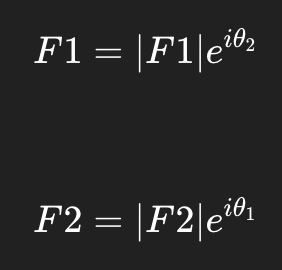

Do you notice how phase describes structure and magnitude describes texture of image ? Mention at last in code comments.


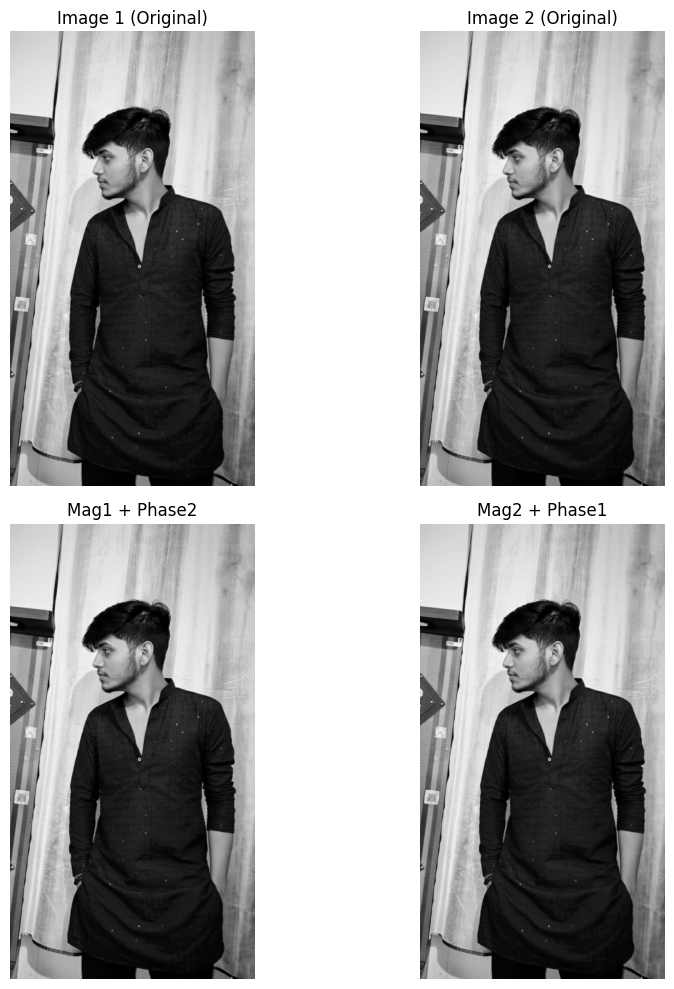

In [ ]:
# Your PART E codes follow here. You can create more cells under this. Write clean and commented code.

import cv2
import numpy as np
import matplotlib.pyplot as plt


def reconstruct_image(fshift_filtered):
    f_ishift = np.fft.ifftshift(fshift_filtered)
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.abs(img_back)
    return np.uint8(np.clip(img_back, 0, 255))

gray_img1 = gray_numpy


f_img1 = np.fft.fft2(gray_img1)
fshift_img1 = np.fft.fftshift(f_img1)


mag1 = np.abs(fshift_img1)
phase1 = np.angle(fshift_img1)

image_path2 = "/content/Ashit Yadav_image.jpeg"

bgr_img2 = cv2.imread(image_path2)

if bgr_img2 is None:
    raise FileNotFoundError(f"Second image not found at path: {image_path2}")


gray_img2 = cv2.cvtColor(bgr_img2, cv2.COLOR_BGR2GRAY)


f_img2 = np.fft.fft2(gray_img2)
fshift_img2 = np.fft.fftshift(f_img2)


mag2 = np.abs(fshift_img2)
phase2 = np.angle(fshift_img2)



hybrid1 = mag1 * np.exp(1j * phase2)

hybrid2 = mag2 * np.exp(1j * phase1)


img_hybrid1 = reconstruct_image(hybrid1)
img_hybrid2 = reconstruct_image(hybrid2)


fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes[0, 0].imshow(gray_img1, cmap='gray')
axes[0, 0].set_title('Image 1 (Original)')
axes[0, 0].axis('off')
axes[0, 1].imshow(gray_img2, cmap='gray')
axes[0, 1].set_title('Image 2 (Original)')
axes[0, 1].axis('off')
axes[1, 0].imshow(img_hybrid1, cmap='gray')
axes[1, 0].set_title('Mag1 + Phase2')
axes[1, 0].axis('off')
axes[1, 1].imshow(img_hybrid2, cmap='gray')
axes[1, 1].set_title('Mag2 + Phase1')
axes[1, 1].axis('off')
plt.tight_layout()
plt.show()


